# Exploración de datos
Se analizarán los resultados de un ensayo destructivo para validar el diseño de rodamientos ([fuente de datos](https://www.kaggle.com/datasets/vinayak123tyagi/bearing-dataset)). El mismo consiste en montar cuatro rodamientos sobre un eje en rotación y aplicar carga radial constante a cada uno de ellos. El proceso finaliza cuando se produce la rotura de alguno de ellos. Se colocaron acelerómetros en cada rodamiento para medir los desplazamientos radiales debido a las vibraciones. 

<img src="schema.png" width="500" height="380">

 Los registros del ensayo completo quedaron plasmados en múltiples archivos, como parte del proceso de adquisición de datos directo.  Lo que se ha hecho es tomar los archivos que dieron cuenta de los últimos tres minutos de la prueba y condensarlo en un único dataset. En total se llevaro a cabo tres ensayos. Para este trabajo se seleccionó el test N°2, en el cual se produce la rotura del rodamiento N°1. Características:

- Registro del test N°2 en 984 archivos. 
- Velocidad de giro: 2000RPM.
- Cargasobre los rodamientos N°2 y N°3: 2721,55Kg.
- Frecuencia de muestreo: 20KH (registro de una muestra cada 50 $\mu$ s).

La compilación de archivos para contar con un formato adecuado para hacer el análisis, se hizo con el script `data_compiler.py`.

## Librerías necesarias

In [1]:
# Librerías principales
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

# Herramientas para graficar
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import Grid
from matplotlib import ticker

# Versiones de librerías
print("".join(f"{x[0]}: {x[1]}\n" for x in [
    ("Numpy",np.__version__),
    ("Pandas",pd.__version__),
    ("Matplotlib",matplotlib.__version__),
]))

Numpy: 1.23.1
Pandas: 1.4.3
Matplotlib: 3.5.1



## Visualización y caracterización de los datos

Se levanta el dataset

In [2]:
# Definición de la ruta
path_record = './data/record/'
path_data = './data'
f = 'dataset.csv'
# Lectura
df = pd.read_csv(os.path.join(path_record,f), dtype='float32')
df.head()

,Time,Bearing 1,Bearing 2,Bearing 3,Bearing 4
0,0.00000,-0.083,0.010,0.093,-0.098
1,0.00005,0.017,-0.068,0.042,-0.005
2,0.00010,0.034,0.059,-0.205,-0.015
3,0.00015,0.012,0.022,-0.186,-0.024
4,0.00020,-0.017,0.112,0.054,-0.115


In [3]:
df.describe()

,Time,Bearing 1,Bearing 2,Bearing 3,Bearing 4
count,3.686400e+06,3.686400e+06,3.686400e+06,3.686400e+06,3.686400e+06
mean,9.201241e+01,-1.888058e-03,-1.408122e-03,-1.518532e-03,-2.913095e-03
std,5.313070e+01,2.074033e-01,1.208153e-01,1.241810e-01,7.922437e-02
min,0.000000e+00,-5.000000e+00,-8.840000e-01,-1.016000e+00,-5.660000e-01
25%,4.607999e+01,-9.300000e-02,-8.100000e-02,-8.100000e-02,-5.100000e-02
50%,9.215998e+01,0.000000e+00,-2.000000e-03,0.000000e+00,-2.000000e-03
75%,1.382400e+02,9.300000e-02,7.600000e-02,7.600000e-02,4.400000e-02
max,1.843199e+02,4.998000e+00,1.118000e+00,1.008000e+00,7.060000e-01


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3686400 entries, 0 to 3686399
Data columns (total 5 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Time       float32
 1   Bearing 1  float32
 2   Bearing 2  float32
 3   Bearing 3  float32
 4   Bearing 4  float32
dtypes: float32(5)
memory usage: 70.3 MB


Se grafica el comportamiento de cada rodamiento. Para poder hacer una comparación, se emplea una misma escala en desplazamientos.

In [5]:
# Función para definir las características de cada subgráfico
def sub_plot(x, y, colors, font_title, font_label, a=1, sub_title=''):
    '''
    Función para configurar cada subgráfico.
    x: datos para ordenadas.
    y: datos para abscisas.
    font_title: tamaño de la fuente del subtítulo.
    font_label: tamaño de la fuente en ejes.
    a: espacio entre principio y fin.
    sub_title: subtítulo
    ''' 
    ax.plot(x, y, color=colors)
    
    ax.set_xlim(-a, x.iloc[-1]+a)
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(5))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.5))
    ax.grid(True)
    
    ax.set_xlabel('tiempo de muestreo (s)', fontsize=font_label)
    ax.set_ylabel('desplazamiento ($\mu$m)', fontsize=font_label)
    ax.set_title(sub_title, fontsize=font_title)

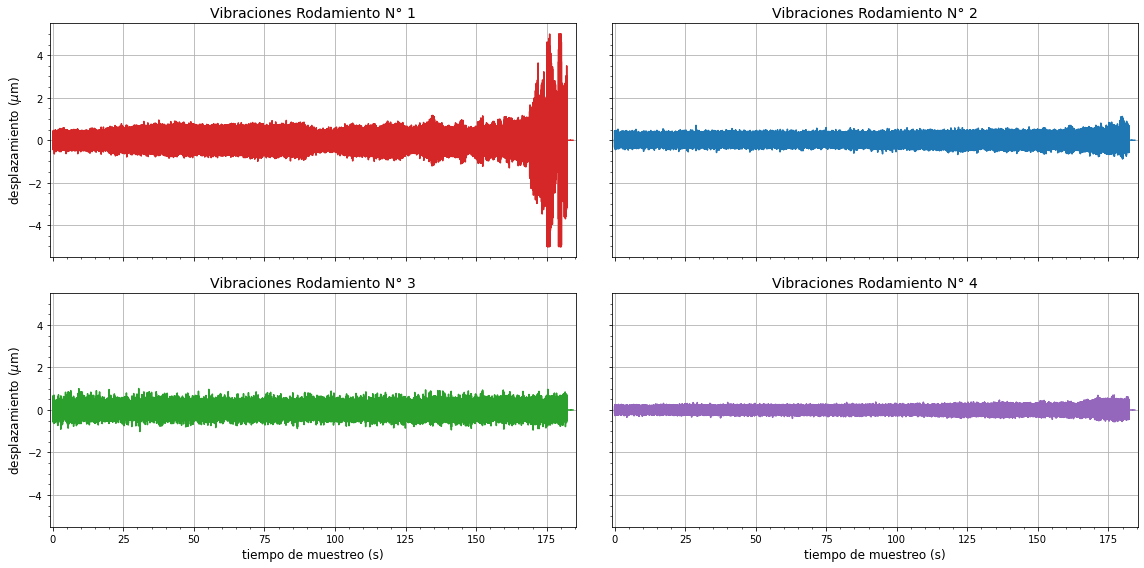

In [6]:
# Set de colores
colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:purple']

# Desarrollo de gráficos en una matriz
fig = plt.figure(1, figsize=(16,8))
grid = Grid(fig, rect=111, nrows_ncols=(2, 2),
            axes_pad=0.5, label_mode='L', share_all=True,
            )
            
k=0
for ax in grid:
    sub_plot(df['Time'], df.iloc[:,k+1], colors[k], 14, 12, sub_title='Vibraciones Rodamiento N° {}'.format(k+1))
    k += 1

plt.tight_layout()

Se puede constatar que ha sido el Rodamiento N°1 el que ha fallado, al observar la amplificación abrupta de la amplitud de desplazamiento, previo a romperse. Cabe destacar que durante el proceso evaluado,  se registra cierta modulación. Situación que no ocurre con el resto de los rodamientos, cuyos modos de vibración permanecen constantes durante todo el ensayo. 

El paso que sigue es trabajar ya con los registros del Rodamiento N°1. Dada la cantidad de registros, se aplicarán distintas estrategias a los fines de achicar el dataset sin perder información relevante. Para luego si, continuar con el preprocesamiento y evaluación de modelos. 

## Generación de nuevos dataset para modelar
Para definir los dataset a emplear en el trabajo, se aplicaron dos estrategias:
- Considerar una tasa de muestreo más baja, generando un nuevo dataset con muestras cada cierta cantidad de tiempo. 
- Selección de muestras de datos. 

En ambos casos, los parámetros que definen su tamaño se han ido ajustando de manera iterativa, teniendo en cuenta: 
- Tamaño final de cada dataset.
- Potencial pérdida de información valiosa.
  

### Disminución de la tasa de muestreo
Se disminuye la cantidad de muestras tomando una tasa de muestreo menor. Se evalúan distintas alternativas. Además, se define el dataframe con solamente los registros del Rodamiento N°1. 

Tasa de muestreo de 2000Hz: 368640 registros.
Tasa de muestreo de 200Hz: 36864 registros.
Tasa de muestreo de 20Hz: 3687 registros.


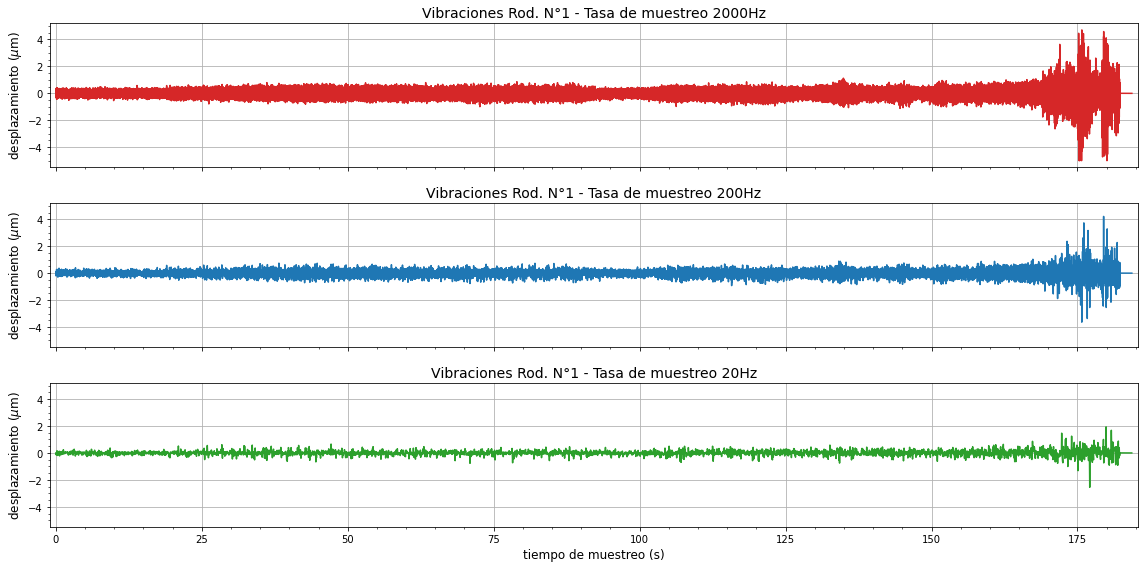

In [7]:
# Dataframe Rodamiento N°1 
df_B1 = df.drop(['Bearing 2', 'Bearing 3', 'Bearing 4'],axis=1)

# Array órdenes de magnitud a probar
sr = [10, 100, 1000]

# Acumulador de los dataframe con la cantidad de registros disminuidos según sr
df_sr = []

# Desarrollo gráfico y guardado de todos los dataframes realizados
fig = plt.figure(1, figsize=(16,8))
grid = Grid(fig, rect=111, nrows_ncols=(3, 1),
            axes_pad=0.5, label_mode='L', share_all=True,
            )

k=0

for ax in grid:
    array_sr = np.arange(0,len(df_B1),sr[k])
    mask_sr = df_B1.iloc[array_sr]
    print(f'Tasa de muestreo de {int(20000/sr[k])}Hz: {len(mask_sr)} registros.')
    sub_plot(mask_sr['Time'], mask_sr['Bearing 1'], colors[k], 14, 12, sub_title=f'Vibraciones Rod. N°1 - Tasa de muestreo {int(20000/sr[k])}Hz')
    df_sr.append(mask_sr)
    k += 1

plt.tight_layout()

Disminuyendo en dos órdenes de magnitud la tasa de muestreo (un registro cada 0,5ms), ya se pierde información relevante al final del proceso. Entoces, el paso que sigue es observar el comportamiento en lapsos de tiempo cortos.

### Partición del dataset
Al realizar la partición del dataset, hubo que considerar entornos pequeños alrededor de tiempos específicos. Resulta difícil poder observar algún tipo de comportamiento a priori. De modo que, finalmente, se tomaron intervalos de 0,15s para los tiempos:
- 100s.
- 130s.
- 160s.
- 176s.

A continuación se confeccionan los gráficos correspondientes a cada intervalo.

In [8]:
df.index[100]

100

Text(0.5, 1.0, 'Vibraciones en Rodamiento N°1: extracción de muestras')

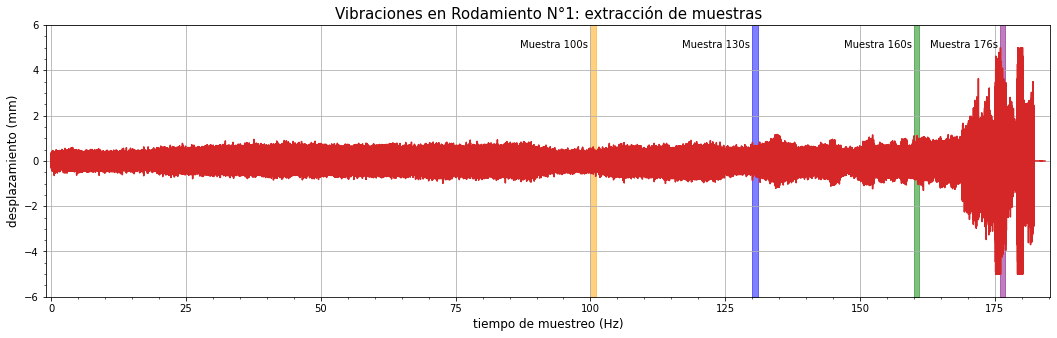

In [9]:
fig, ax  = plt.subplots(1,1, figsize=(18, 5))

ax.plot(df['Time'], df.iloc[:,1], color='tab:red')
ax.set_xlim(-1, df['Time'].iloc[-1]+1)
ax.set_ylim(-6, 6)
ax.xaxis.set_minor_locator(ticker.MultipleLocator(5))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.5))
ax.grid()
ax.fill_betweenx([-6, 6],df.index[100], df.index[101], color ='orange', alpha = 0.5)
ax.fill_betweenx([-6, 6],df.index[130], df.index[131], color ='blue', alpha = 0.5)
ax.fill_betweenx([-6, 6],df.index[160], df.index[161], color ='green', alpha = 0.5)
ax.fill_betweenx([-6, 6],df.index[176], df.index[177], color ='purple', alpha = 0.5)
ax.text(df.index[87], 5, "Muestra 100s")
ax.text(df.index[117], 5, "Muestra 130s")
ax.text(df.index[147], 5, "Muestra 160s")
ax.text(df.index[163], 5, "Muestra 176s")
ax.set_xlabel('tiempo de muestreo (Hz)', fontsize=12)
ax.set_ylabel('desplazamiento (mm)', fontsize=12)
ax.set_title(f'Vibraciones en Rodamiento N°1: extracción de muestras', fontsize=15)

Intervalo para 100s: 3000 registros.
Intervalo para 130s: 3001 registros.
Intervalo para 160s: 3001 registros.
Intervalo para 176s: 3001 registros.


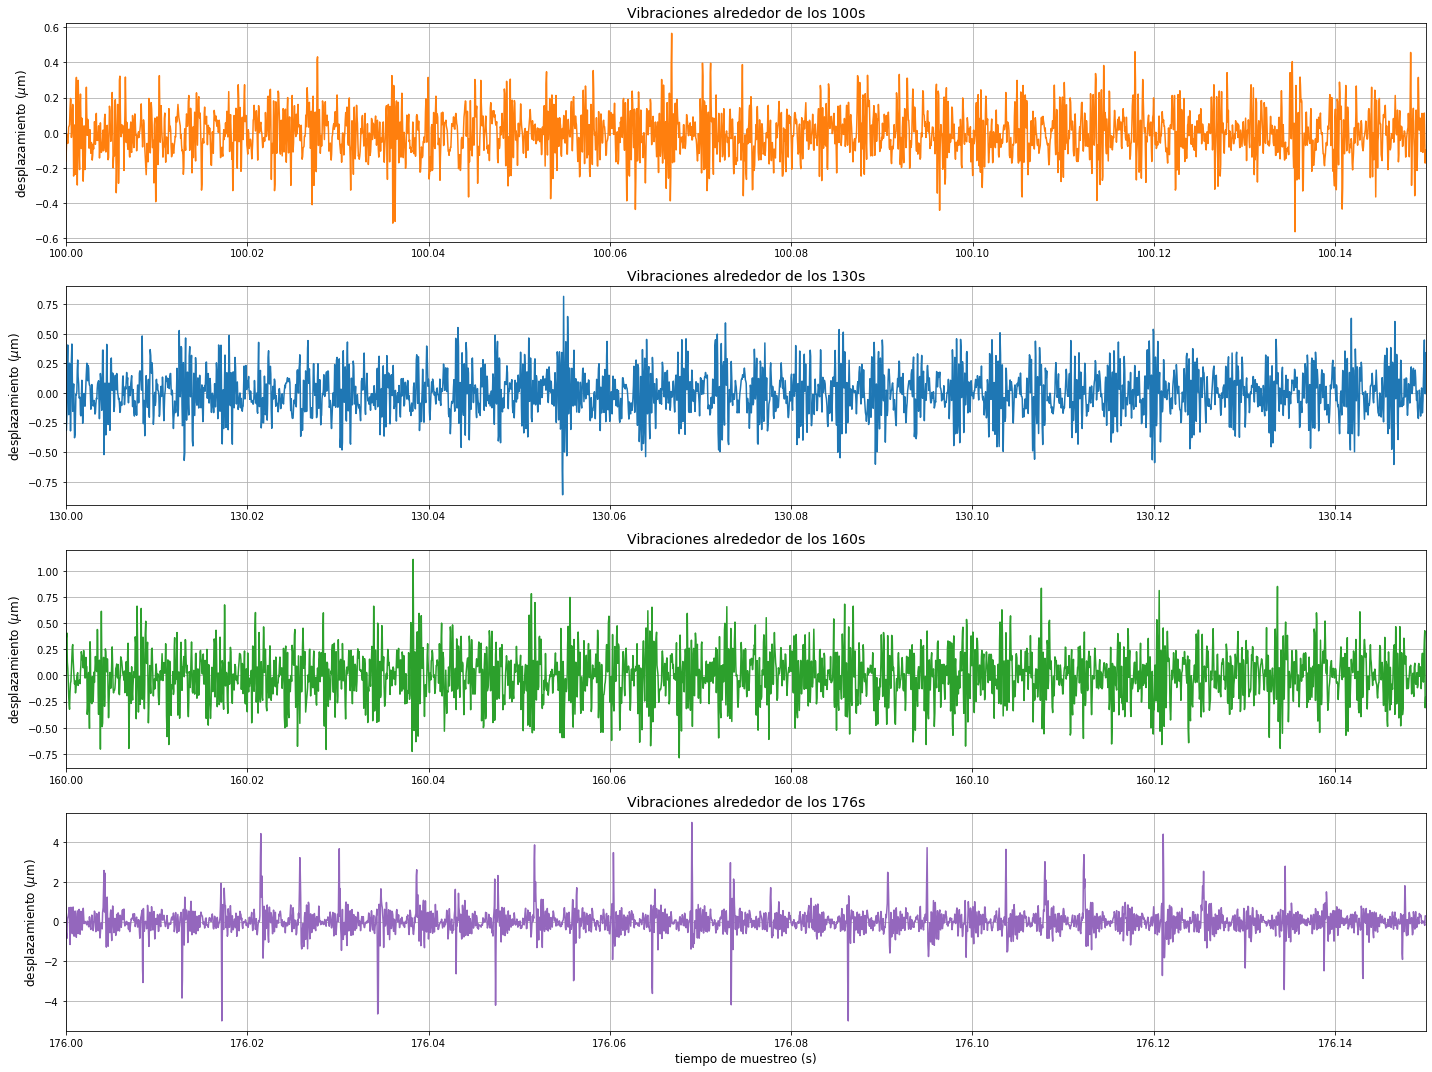

In [10]:
point = [100, 130, 160, 176]
df_p = []
colorsB = ['tab:orange', 'tab:blue', 'tab:green', 'tab:purple']

lag = 0.15
k=0
fig, axs = plt.subplots(4, 1, figsize=(20, 15))

for i in range(len(point)):
    mask_p = df_B1.loc[(df_B1['Time'] >= point[k]) & (df_B1['Time'] <= (point[k]+lag))]
    print(f'Intervalo para {int(point[k])}s: {len(mask_p)} registros.')
    axs[i].plot(mask_p['Time'], mask_p['Bearing 1'], color=colorsB[k])
    axs[i].set_xlim(mask_p['Time'].iloc[0], mask_p['Time'].iloc[-1])
    axs[i].grid(True)
    axs[i].set_ylabel('desplazamiento ($\mu$m)', fontsize=12)
    axs[i].set_title(f'Vibraciones alrededor de los {int(point[k])}s', fontsize=14)
    k +=1
    df_p.append(mask_p)

plt.xlabel('tiempo de muestreo (s)', fontsize=12)
plt.tight_layout()

A priori, se observa cierta modulación. Restará averiguar cómo se modifica a medida que se aproxima al momento de la falla del rodamiento.

### Exportación de datasets para estudio estadístico
A la luz de los resultados, se exportan los cuatro datasets obtenidos de la partición del original. Ahora si se lo puede considerar series de tiempo.

In [11]:
# lista con las denominaciones de archivo
files_name = ['dataset_100s.csv', 'dataset_130s.csv', 'dataset_160s.csv', 'dataset_176s.csv']
# Exportación a csv de cada dataframe
for i in range(len(files_name)):
    df_p[i].to_csv(os.path.join(path_data, files_name[i]), index=False)